#### 미세먼지 현황 분석

##### 데이터 수집 사이트

- 에어코리아 : https://www.airkorea.or.kr/web/pastSearch?pMENU_NO=123

- 기상자료 개방포털 : https://data.kma.go.kr/data/grnd/selectAwsRltmList.do?pgmNo=56

##### 에어코리아 데이터 수집, 전처리

In [1]:
import pandas as pd
import numpy as np

In [ ]:
dust2203 = pd.read_excel('./raw/202203_data_past_day.xlsx')
dust2203.drop(axis=0, index=[0], inplace=True) # 두 번째 행 삭제
dust2203

In [7]:
dust2203.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 1 to 31
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      31 non-null     object
 1   PM10    31 non-null     object
 2   PM2.5   31 non-null     object
 3   오 존     31 non-null     object
 4   이산화질소   31 non-null     object
 5   일산화탄소   31 non-null     object
 6   아황산가스   31 non-null     object
dtypes: object(7)
memory usage: 1.8+ KB


In [ ]:
# 컬럼명을 영문으로
dust2203.rename(columns={'날짜':'date', 'PM10': 'pm10', 'PM2.5':'pm25', '오 존': 'o3', '이산화질소':'no2', '일산화탄소' : 'co', '아황산가스': 'so2'}, inplace=True) # inplace까지 해야 바뀜

dust2203

In [11]:
dust2203.dtypes

date    object
pm10    object
pm25    object
o3      object
no2     object
co      object
so2     object
dtype: object

In [23]:
# 타입변경
dust2203 = dust2203.astype({'date':'datetime64[ns]', 'pm10':'int64', 'pm25':'int64', 'o3': 'float64', 'no2':'float64', 'co':'float64', 'so2':'float64'})
dust2203.tail()

,date,pm10,pm25,o3,no2,co,so2
27,2022-03-27,34,15,0.039,0.009,0.3,0.002
28,2022-03-28,24,12,0.034,0.013,0.2,0.002
29,2022-03-29,35,18,0.024,0.024,0.3,0.003
30,2022-03-30,44,25,0.016,0.027,0.3,0.004
31,2022-03-31,33,20,0.030,0.014,0.3,0.002


In [20]:
dust2203.dtypes

date    datetime64[ns]
pm10             int64
pm25             int64
o3             float64
no2            float64
co             float64
so2            float64
dtype: object

In [24]:
# 날짜를 년, 월, 일로 분해해서 컬럼 생성
dust2203['year'] = dust2203['date'].dt.year
dust2203['month'] = dust2203['date'].dt.month
dust2203['day'] = dust2203['date'].dt.day

In [25]:
dust2203.tail()

,date,pm10,pm25,o3,no2,co,so2,year,month,day
27,2022-03-27,34,15,0.039,0.009,0.3,0.002,2022,3,27
28,2022-03-28,24,12,0.034,0.013,0.2,0.002,2022,3,28
29,2022-03-29,35,18,0.024,0.024,0.3,0.003,2022,3,29
30,2022-03-30,44,25,0.016,0.027,0.3,0.004,2022,3,30
31,2022-03-31,33,20,0.030,0.014,0.3,0.002,2022,3,31


In [29]:
# 컬럼순서 재정렬
dust2203 = dust2203[['date', 'year', 'month', 'day', 'so2', 'co', 'o3', 'no2', 'pm10', 'pm25']]
dust2203.head()

,date,year,month,day,so2,co,o3,no2,pm10,pm25
1,2022-03-01,2022,3,1,0.003,0.3,0.028,0.026,46,32
2,2022-03-02,2022,3,2,0.003,0.3,0.028,0.018,48,33
3,2022-03-03,2022,3,3,0.004,0.3,0.034,0.021,52,30
4,2022-03-04,2022,3,4,0.004,0.4,0.035,0.026,93,47
5,2022-03-05,2022,3,5,0.003,0.2,0.039,0.010,89,21


In [31]:
dust2203.isnull().sum()

date     0
year     0
month    0
day      0
so2      0
co       0
o3       0
no2      0
pm10     0
pm25     0
dtype: int64

##### 기상청 데이터 확인 및 전처리

In [ ]:
weather_2203 = pd.read_excel('./raw/OBS_AWS_TIM_202203_data.xlsx')
weather_2203

In [33]:
weather_2203.info()

# 타입 바꿀 필요 없음 잘 되어 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   지점       744 non-null    int64         
 1   지점명      744 non-null    object        
 2   일시       744 non-null    datetime64[ns]
 3   기온(°C)   744 non-null    float64       
 4   풍속(m/s)  744 non-null    float64       
 5   강수량(mm)  731 non-null    float64       
 6   습도(%)    744 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 40.8+ KB


In [35]:
# 지점, 지점명 컬럼 삭제
weather_2203.drop('지점',axis=1, inplace=True) #axis=1이 컬럼 삭제임 axis=0은 행 삭제
weather_2203.drop('지점명',axis=1,  inplace=True)

In [37]:
weather_2203.head()

,일시,기온(°C),풍속(m/s),강수량(mm),습도(%)
0,2022-03-01 00:00:00,8.7,0.8,0.0,40
1,2022-03-01 01:00:00,8.2,0.5,0.0,48
2,2022-03-01 02:00:00,8.1,0.3,0.0,54
3,2022-03-01 03:00:00,7.2,0.7,0.0,59
4,2022-03-01 04:00:00,7.2,0.1,0.0,63


In [39]:
weather_2203.columns = ['date', 'temp', 'wind', 'rain', 'humid'] # rename말고 다른 방법으로 컬럼명 바꾸기
weather_2203.tail()

,date,temp,wind,rain,humid
739,2022-03-31 19:00:00,10.9,4.8,0.0,70
740,2022-03-31 20:00:00,10.5,2.7,0.0,74
741,2022-03-31 21:00:00,10.2,3.1,0.0,68
742,2022-03-31 22:00:00,10.0,2.9,0.0,66
743,2022-03-31 23:00:00,9.4,5.8,0.0,65


In [41]:
weather_2203['date'] = pd.to_datetime(weather_2203['date']).dt.date

In [42]:
weather_2203.dtypes

date      object
temp     float64
wind     float64
rain     float64
humid      int64
dtype: object

In [46]:
weather_2203 = weather_2203.astype({'date':'datetime64[ns]'})

In [47]:
weather_2203.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    744 non-null    datetime64[ns]
 1   temp    744 non-null    float64       
 2   wind    744 non-null    float64       
 3   rain    731 non-null    float64       
 4   humid   744 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 29.2 KB


In [ ]:
weather_2203[weather_2203['rain'].isnull()]

In [57]:
# 강수량 결측치를 0.0으로 설정
weather_2203['rain'].fillna(0.0, inplace=True) #inplace=True를 해야 저장됨

In [ ]:
weather_2203.info()

In [ ]:
# 강수량은 0.1단위로 측정하기때문에 0인 데이터는 0.01로 변경
weather_2203['rain'] = weather_2203['rain'].replace([0], 0.01)
weather_2203['rain'].value_counts()

In [69]:
weather_2203_new = weather_2203.groupby(weather_2203['date']).mean()
weather_2203_new.head()

,temp,wind,rain,humid
date,,,,
2022-03-01,9.737500,1.875000,0.091667,71.250000
2022-03-02,6.820833,2.920833,0.010000,45.500000
2022-03-03,6.595833,2.516667,0.010000,51.291667
2022-03-04,7.387500,2.804167,0.010000,68.583333
2022-03-05,9.104167,5.137500,0.010000,35.375000


##### 미세먼지, 날씨 데이터 병합

In [74]:
df_total = pd.merge(dust2203, weather_2203_new, how='inner', left_on='date', right_index=True)
df_total.tail()

,date,year,month,day,so2,co,o3,no2,pm10,pm25,temp,wind,rain,humid
27,2022-03-27,2022,3,27,0.002,0.3,0.039,0.009,34,15,13.050000,2.675000,0.01,59.041667
28,2022-03-28,2022,3,28,0.002,0.2,0.034,0.013,24,12,9.608333,2.950000,0.01,42.458333
29,2022-03-29,2022,3,29,0.003,0.3,0.024,0.024,35,18,10.166667,2.670833,0.01,62.375000
30,2022-03-30,2022,3,30,0.004,0.3,0.016,0.027,44,25,12.250000,2.166667,0.01,86.125000
31,2022-03-31,2022,3,31,0.002,0.3,0.030,0.014,33,20,12.625000,3.450000,0.01,74.375000


In [76]:
# 인덱스 재정리 (1부터 시작해서 0부터 시작하는걸로 다시 설정했음)
df_total.reset_index(drop=True, inplace=True)

In [78]:
df_total.tail()

,date,year,month,day,so2,co,o3,no2,pm10,pm25,temp,wind,rain,humid
26,2022-03-27,2022,3,27,0.002,0.3,0.039,0.009,34,15,13.050000,2.675000,0.01,59.041667
27,2022-03-28,2022,3,28,0.002,0.2,0.034,0.013,24,12,9.608333,2.950000,0.01,42.458333
28,2022-03-29,2022,3,29,0.003,0.3,0.024,0.024,35,18,10.166667,2.670833,0.01,62.375000
29,2022-03-30,2022,3,30,0.004,0.3,0.016,0.027,44,25,12.250000,2.166667,0.01,86.125000
30,2022-03-31,2022,3,31,0.002,0.3,0.030,0.014,33,20,12.625000,3.450000,0.01,74.375000


##### 상관관계 및  시각화

In [79]:
import matplotlib
# from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, rcParams
import seaborn as sns

import pandas as pd
import numpy as np

font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
font = font_manager.FontProperties(fname=font_path).get_name() # 'NanumGothic'
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

In [84]:
# 모든 요소별 상관관계 확인
df_corr = df_total.corr()
df_corr

,date,year,month,day,so2,co,o3,no2,pm10,pm25,temp,wind,rain,humid
date,1.000000,NaN,NaN,1.000000,-0.100134,0.005828,-0.142645,-0.207581,-0.448966,-0.338657,0.456464,0.049320,0.188732,0.274147
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,1.000000,NaN,NaN,1.000000,-0.100134,0.005828,-0.142645,-0.207581,-0.448966,-0.338657,0.456464,0.049320,0.188732,0.274147
so2,-0.100134,NaN,NaN,-0.100134,1.000000,0.498000,-0.503464,0.783528,0.498944,0.565337,-0.160594,-0.371282,-0.265360,-0.115076
co,0.005828,NaN,NaN,0.005828,0.498000,1.000000,-0.143533,0.630026,0.497031,0.731637,0.052386,-0.501126,-0.164816,0.229541
o3,-0.142645,NaN,NaN,-0.142645,-0.503464,-0.143533,1.000000,-0.621709,0.120807,-0.012358,0.091841,0.518979,0.266266,-0.181176
no2,-0.207581,NaN,NaN,-0.207581,0.783528,0.630026,-0.621709,1.000000,0.556710,0.707631,-0.103512,-0.609909,-0.386489,0.144044
pm10,-0.448966,NaN,NaN,-0.448966,0.498944,0.497031,0.120807,0.556710,1.000000,0.876764,-0.129153,-0.130687,-0.357563,-0.190489
pm25,-0.338657,NaN,NaN,-0.338657,0.565337,0.731637,-0.012358,0.707631,0.876764,1.000000,-0.093549,-0.370287,-0.354660,-0.003303


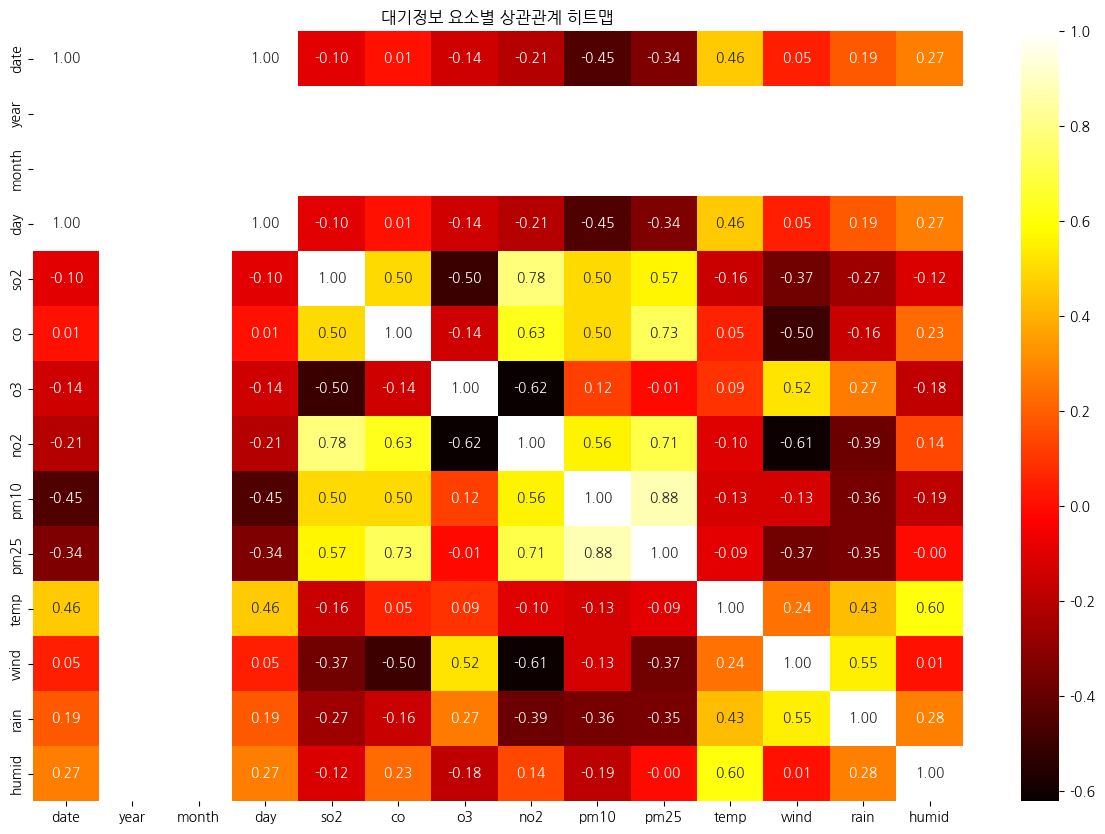

In [85]:
# 히트맵으로 상관관계 표시

plt.figure(figsize=(15, 10))
plt.title('대기정보 요소별 상관관계 히트맵')

sns.heatmap(data=df_corr, annot=True, fmt='.2f', cmap='hot')

plt.show()

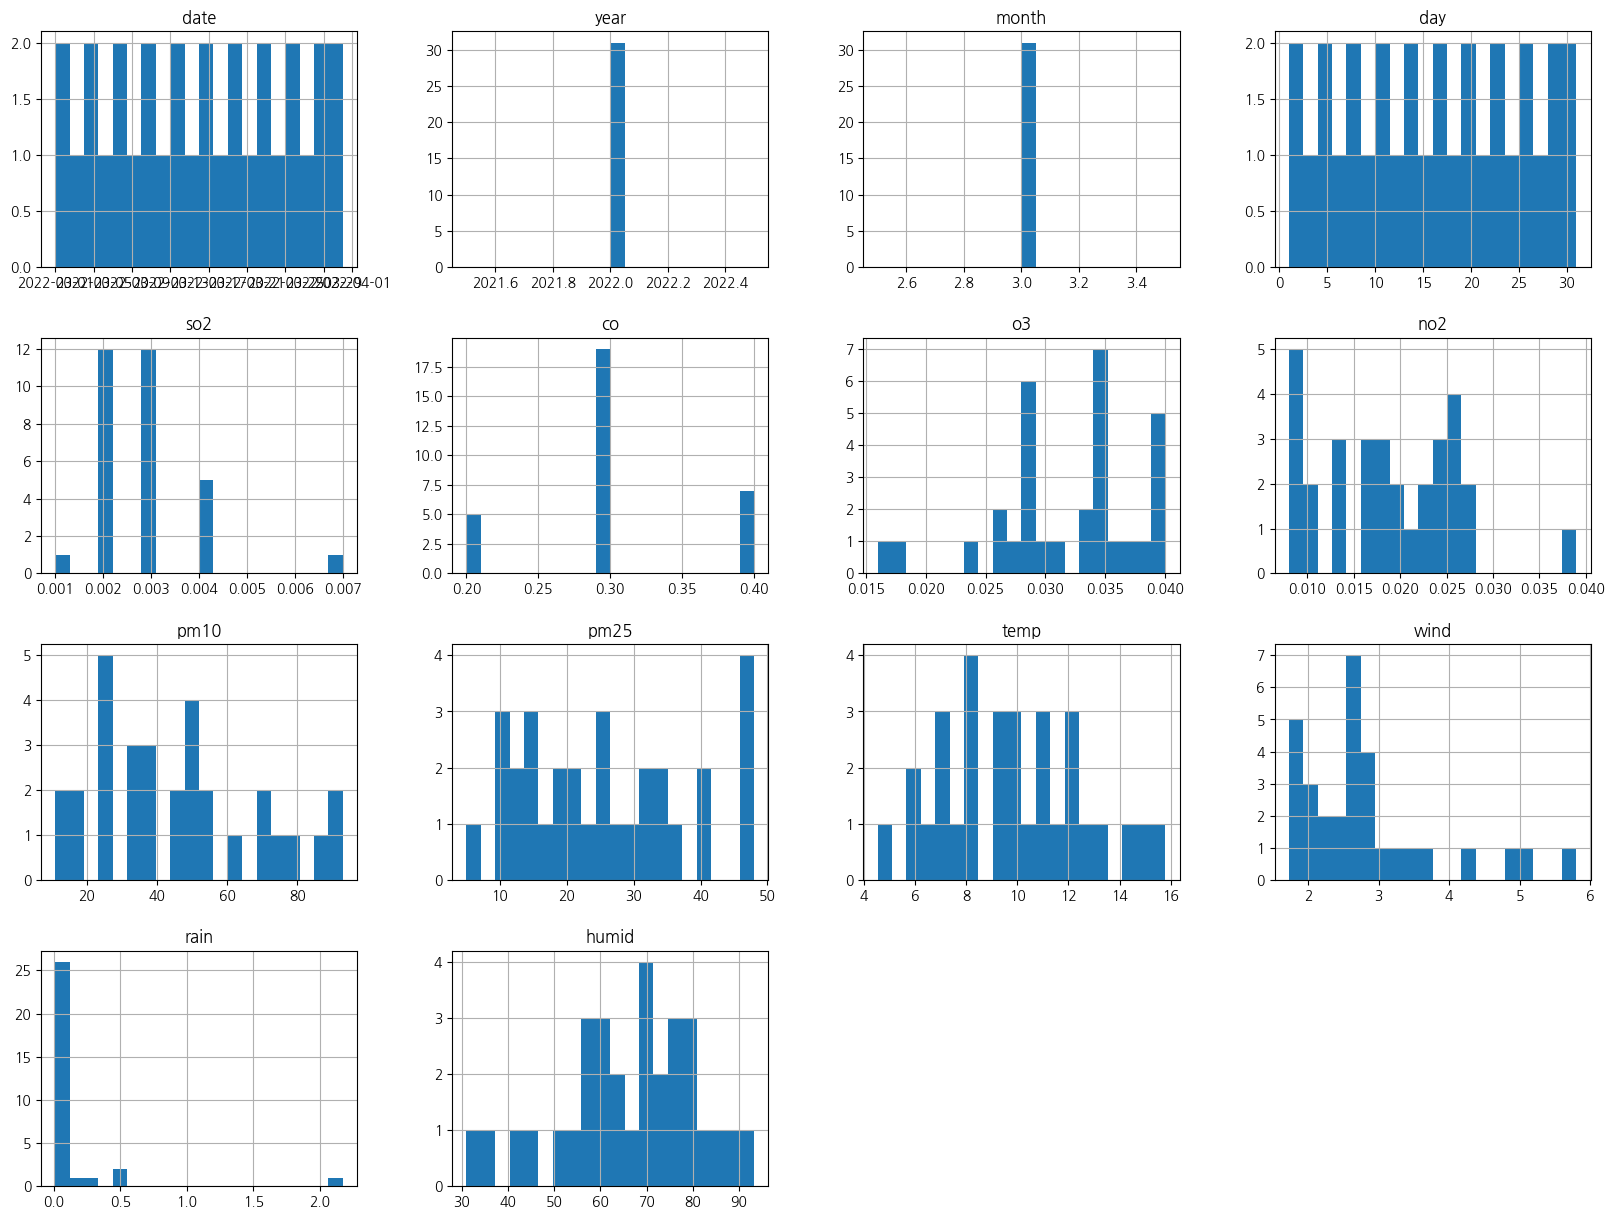

In [89]:
# 히스토그램 시각화
df_total.hist(bins=20, figsize=(20, 15))
plt.show()

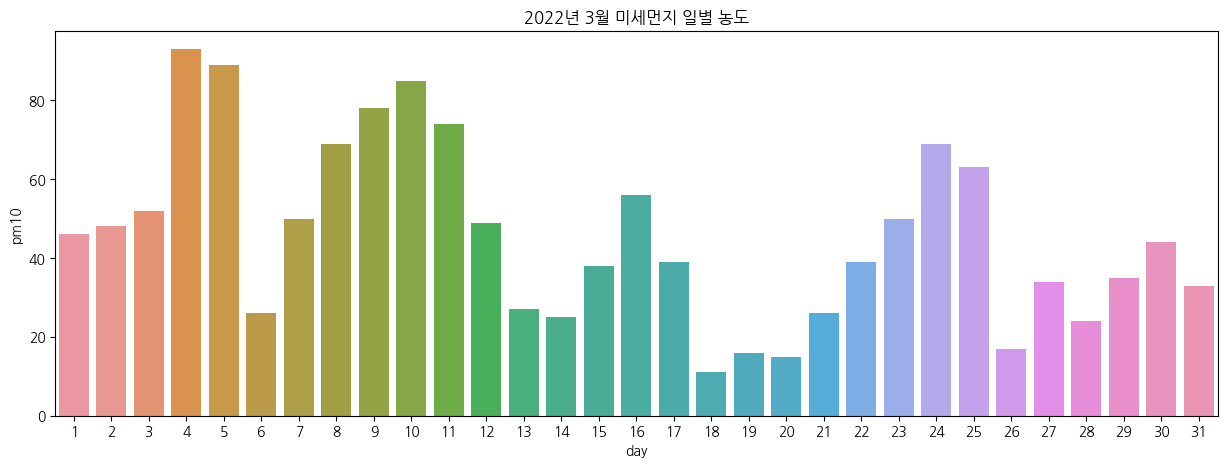

In [98]:
# 날짜별 미세먼지 농도 막대그래프
plt.figure(figsize=(15, 5))
plt.title('2022년 3월 미세먼지 일별 농도')
sns.barplot(x='day', y='pm10', data=df_total)
#plt.xticks(rotation=0) # x축 글자 회전

plt.show()

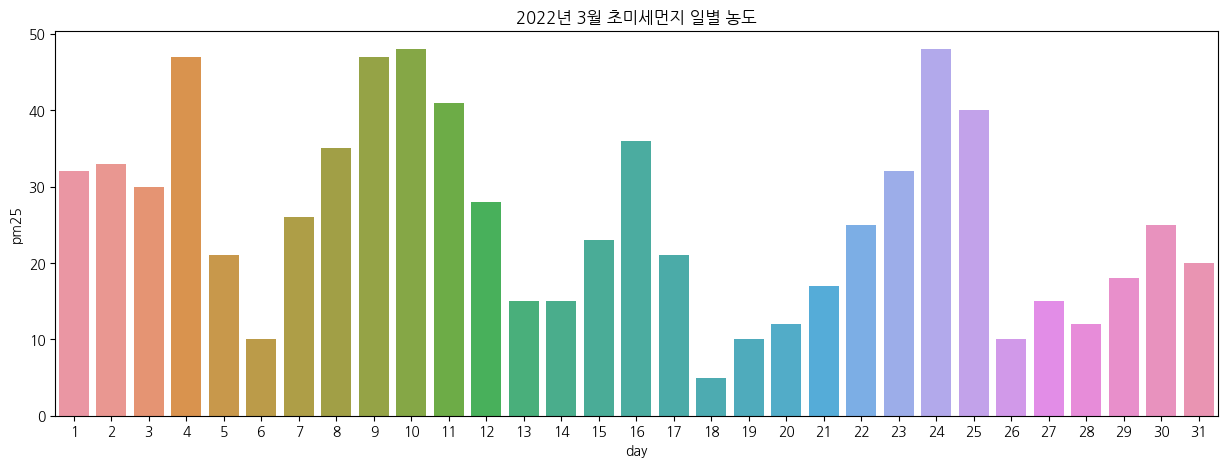

In [99]:
# 날짜별 미세먼지 농도 막대그래프
plt.figure(figsize=(15, 5))
plt.title('2022년 3월 초미세먼지 일별 농도')
sns.barplot(x='day', y='pm25', data=df_total)
#plt.xticks(rotation=0) # x축 글자 회전

plt.show()

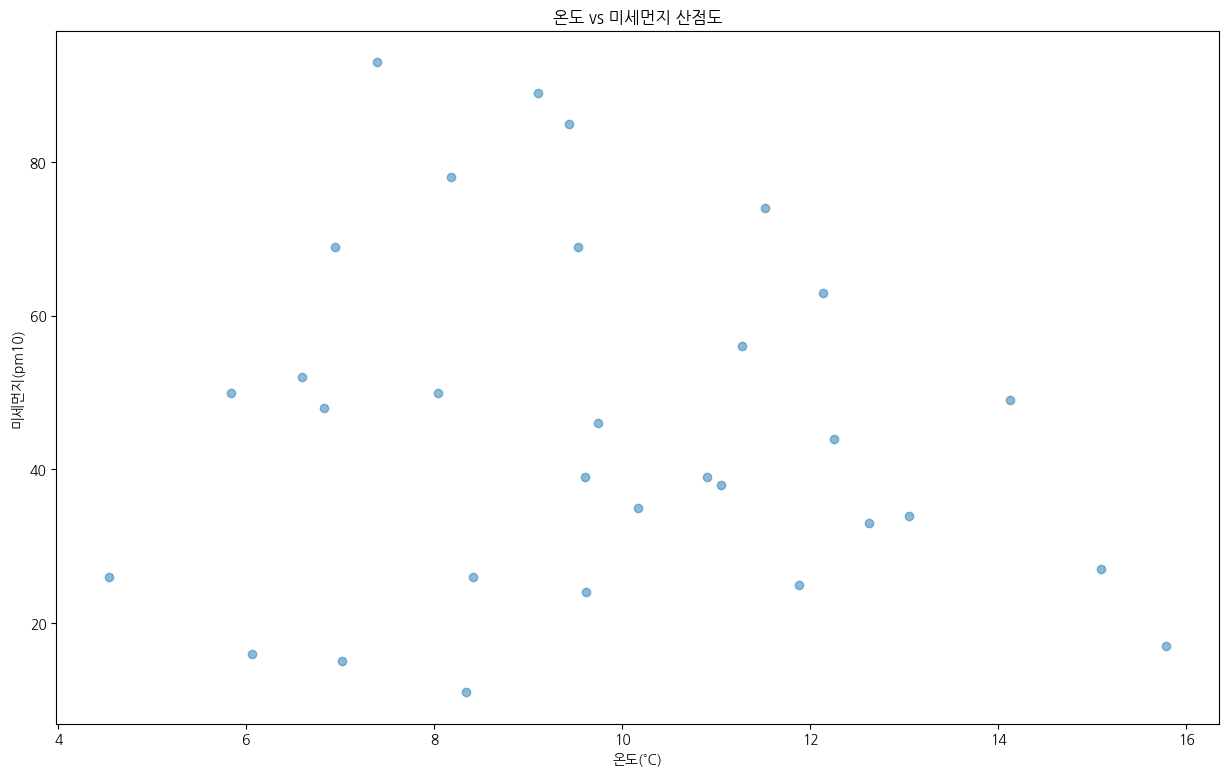

In [104]:
# 산점도 Scatterplot
plt.figure(figsize=(15, 9))
plt.title('온도 vs 미세먼지 산점도')
plt.plot(df_total['temp'], df_total['pm10'], marker='o', linestyle='none', alpha=0.5)
plt.xlabel('온도(˚C)')
plt.ylabel('미세먼지(pm10)')
plt.show()

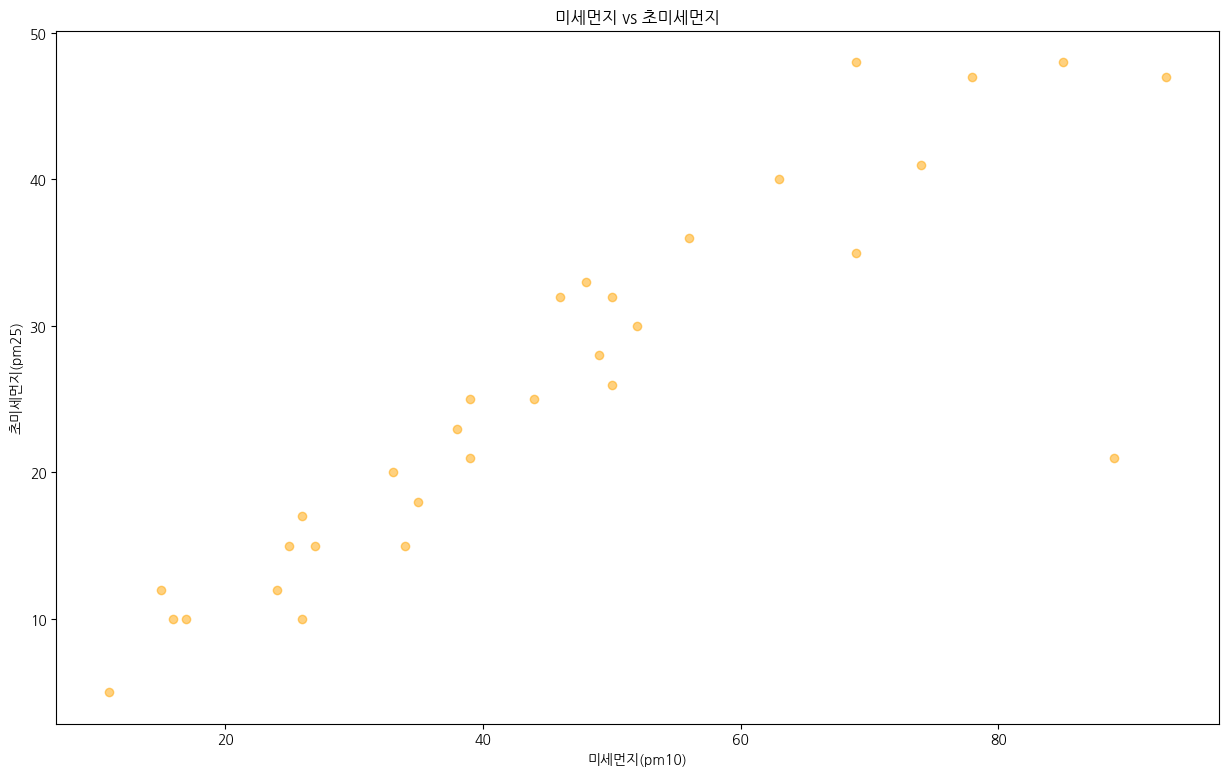

In [112]:
# 산점도 Scatterplot
plt.figure(figsize=(15, 9))
plt.title('미세먼지 vs 초미세먼지')
plt.plot(df_total['pm10'], df_total['pm25'], marker='o', linestyle='none', color='orange', alpha=0.5)
plt.xlabel('미세먼지(pm10)')
plt.ylabel('초미세먼지(pm25)')
plt.show()

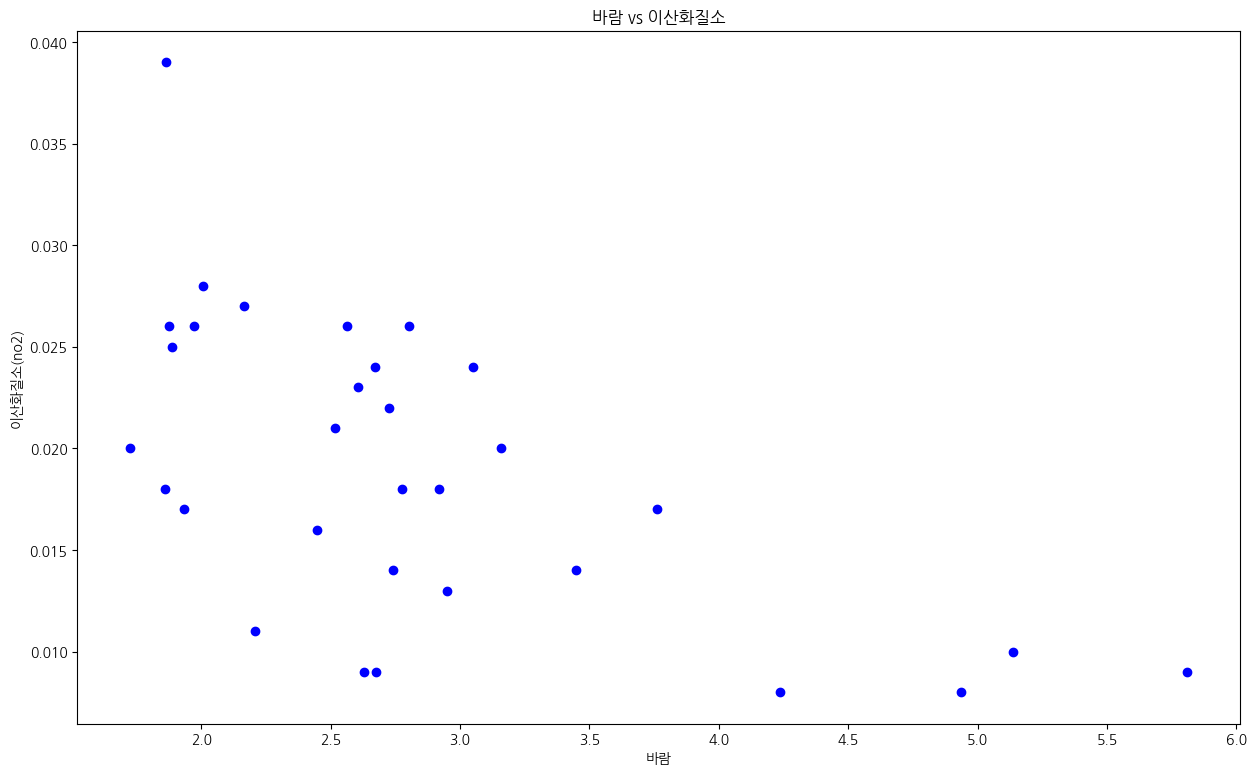

In [111]:
# 산점도 Scatterplot
plt.figure(figsize=(15, 9))
plt.title('바람 vs 이산화질소')
plt.plot(df_total['wind'], df_total['no2'], marker='o', linestyle='none', color='blue')
plt.xlabel('바람')
plt.ylabel('이산화질소(no2)')
plt.show()